In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import pearsonr

# Define run of interest

---

In [172]:
run_of_interest = 'hardrep__min__5'

# Point to where the results are stored

---

In [173]:
results_dir = '/Users/owenrogers/PycharmProjects/MDRFEP/data/grid_search_results'
mdrfep_output = os.path.join(results_dir, f'for_plotting_{run_of_interest}.sc')
os.path.exists(mdrfep_output)

True

### Read into dataframe

---

In [174]:
df = pd.read_csv(mdrfep_output)

In [175]:
print(df.columns)

Index(['ssm_parent', 'dg_fold', 'dg_fold_lb', 'dg_fold_ub', 'monomer_dg',
       'dimer_dg', 'ddg', 'delta_exp_ddg_lb', 'delta_exp_ddg_center',
       'delta_exp_ddg_ub', 'ssm_seqpos', 'ssm_letter', 'delta_rosetta_lb',
       'delta_rosetta_ub', 'is_interface_core', 'is_interface_boundary',
       'is_monomer_core', 'is_monomer_boundary', 'is_monomer_surface',
       'ddg_monomer', 'ddg_rosetta'],
      dtype='object')


In [176]:
print(df['ddg_monomer'].values.min())
print(df['ddg_monomer'].values.max())

-3.5108501267527425e-08
299.91988113471115


# Create subsets for each value, clipping at 0 (because values <= 0 don't contribute to ∆∆G_rosetta)

---

In [177]:
correlations = []

In [178]:
# ddg monomer values
x_stabilities = np.sort(df['ddg_monomer'].unique()).clip(0, None)

In [179]:
# iterate through
for x0 in x_stabilities:
    
    subset = df[df['ddg_monomer'] < x0]
    
    if len(subset) > 2:
        corr = pearsonr(subset['ddg_rosetta'], subset['delta_exp_ddg_center'])
    else:
        corr = np.nan
        
    try:
        correlations.append(corr.statistic)
    except:
        correlations.append(corr)

In [180]:
print(len(x_stabilities))
print(len(correlations))

4192
4192


# Plot results

---

In [181]:
plot_df = pd.DataFrame({'ddg_monomer': x_stabilities, 'correlation': correlations})

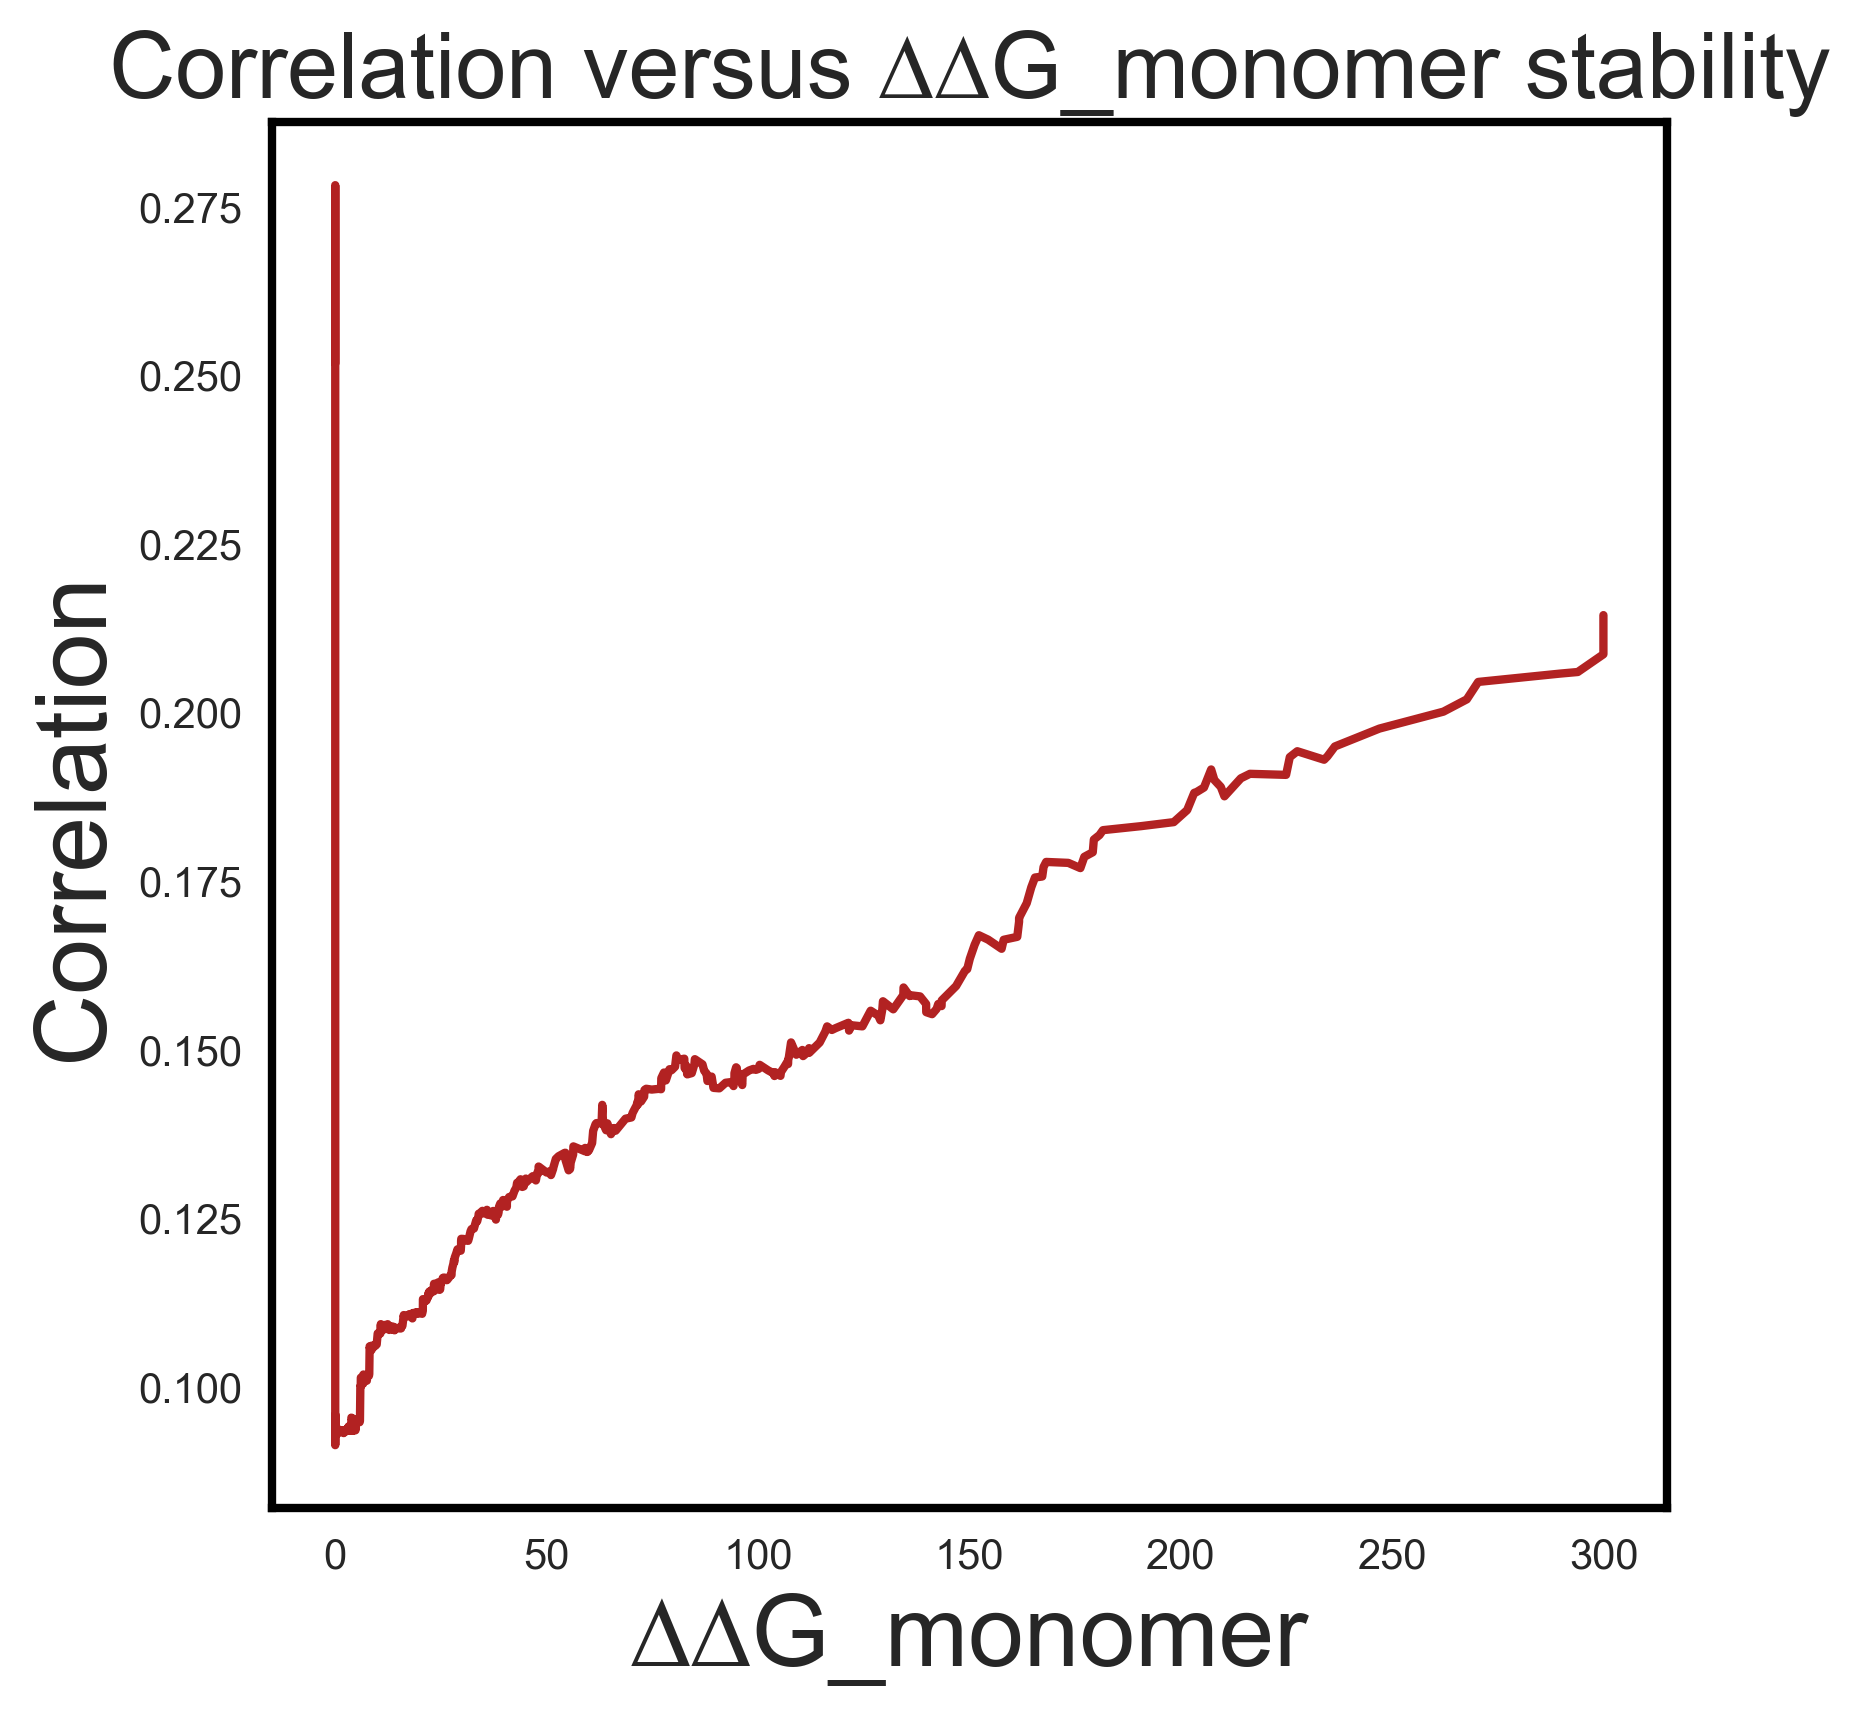

In [182]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

sns.lineplot(data=plot_df, 
                x='ddg_monomer', 
                y='correlation', 
                ax=ax,
                color='firebrick',
                linewidth=2
                )

ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
        
ax.set_title('Correlation versus ∆∆G_monomer stability', fontsize=22)
ax.set_xlabel('∆∆G_monomer', fontsize=24)
ax.set_ylabel('Correlation', fontsize=24)
     
plt.grid(False)
plt.savefig(os.path.join(results_dir, f'monomer_stability_{run_of_interest}.png'), dpi=300)
plt.show()